In [1]:
import sys

import numpy as np
import pandas as pd
import scipy.io as sio

import os

from core import *

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt



/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

In [2]:
data_folder='~/Bcells/GitHub/Bit/Data/'

In [6]:
table_summary= pd.DataFrame(columns=['Data','sen_ig','spec_ig' ,'ppv_ig' ,'sen_my' ,'spec_my' ,'ppv_my','size_full','size_ig'])
table_summary_my= pd.DataFrame(columns=['Data','sen_short','sen_mid','sen_long','spec_short','spec_mid','spec_long','ppv_short','ppv_mid','ppv_long'])
table_summary_clones= pd.DataFrame(columns=['Data','num_c_my','num_m_my' ,'num_ac_my' ,'num_acm_my' ,'num_c_ig','num_m_ig'])
table_a= pd.DataFrame(columns=['clone','table','ig'])

In [7]:
for i in range (1,30):

        table_a=table_a.append({'clone':data_folder+'clone_dataMS4_v'+str(i)+'.csv','table': data_folder+'SimData/sim_dataMS4_v'+str(i)+'.csv' ,'ig': data_folder+'Igblast_res/sampleMS4_o'+str(i)+'_germ-pass.tab' }, ignore_index=True)


In [8]:
for i in range (1,29):
 
        table_a=table_a.append({'clone':data_folder+'clone_dataMS3_v'+str(i)+'.csv','table': data_folder+'SimData/sim_dataMS3_v'+str(i)+'.csv' ,'ig': data_folder+'Igblast_res/sampleMS3_o'+str(i)+'_germ-pass.tab' }, ignore_index=True)

In [9]:
bins=np.arange(0,0.6,0.005)

In [10]:
table_multiple=pd.read_table(data_folder+'MS_functional_SUBJECT-M2_clone-pass_germ-pass.tab')

/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [196]:
table_small=table_multiple[table_multiple['INDELS']=='F']
table_small=table_small[table_small['FUNCTIONAL']=='T']
ind_G=np.where(table_small['PRCONS']=='IGHG')[0]
ind_M=np.where(table_small['PRCONS']=='IGHM')[0]
df = pd.DataFrame(table_small.SEQUENCE_INPUT[ind_G])
df2=pd.DataFrame(table_small.SEQUENCE_INPUT[ind_M])

table_neg=df.append(df2,ignore_index=True)
table_neg=table_neg.SEQUENCE_INPUT[np.where(table_neg.isnull()==False)[0]]

/home/ofir/.local/lib/python3.5/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [197]:
MM=30000

MM1=15000

table_short_neg=table_neg[:MM1]
#del table_multiple

In [198]:
table_short_neg_B=result['db']['SEQUENCE_INPUT'][result['db']['INDELS']==False][:5000]
table_short_neg_C=resultB['db']['SEQUENCE_INPUT'][resultB['db']['INDELS']==False][:5000]

table_short_neg_D=resultC['db']['SEQUENCE_INPUT'][resultC['db']['INDELS']==False][:5000]

In [225]:
table_short_neg_B=pd.read_csv(data_folder+'Briney_1.csv')

In [222]:
table_short_neg_C=pd.read_csv(data_folder+'Briney_2.csv')

In [226]:
table_short_neg_D=pd.read_csv(data_folder+'Briney_3.csv')

In [199]:
def evaluate_ig_clones(clone_list_short):
    clone_vals_ig=np.unique(clone_list_short)
    count_clones=0 
    count_clone_members=0
    for i in range (0,clone_vals_ig.shape[0]):
        temp=np.where(clone_list_short==clone_vals_ig[i])
        if temp[0].shape[0]>1:
            count_clones=count_clones+1
            count_clone_members=count_clone_members+temp[0].shape[0]
    return count_clones,count_clone_members


In [202]:
table_full.shape

W_l=150   
thresh_array_a=[]
thresh_array_b=[]
thresh_array_o=[]

spec_vs_thresh_a=[]
spec_vs_thresh_b=[]
M_L=2000000
spec_arr_a=[]
spec_arr_b=[]
for i in range(0,55):
    table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])

    clone_list_short=table_clone.values[table_ig.SEQUENCE_ID-1][:,1]
    rest_indices=np.setdiff1d(table_full.index, table_ig.SEQUENCE_ID-1)
    clone_list_rest=table_clone.values[rest_indices][:,1]
    clone_list=table_clone.SEED_SEQUENCE_ID[:]

    clone_table_for_ig=np.hstack((clone_list_short,clone_list_rest))
   # table_ig.CLONE

    ig_num_clones,ig_num_clone_members=evaluate_ig_clones(clone_list_short)
    table_clone_list=np.copy(clone_list_short)
    
    
    
    table_clone_list_full=np.copy(clone_list)
    fake_clones=np.arange(np.max(table_ig.CLONE.values),np.max(table_ig.CLONE.values)+table_clone_list_full.shape[0]-table_clone_list.shape[0],1)
    clusters_ig_full = np.hstack((table_ig.CLONE.values,fake_clones))
    if 0:


        sensitivity_ig=sensitivity_comp(clone_table_for_ig ,clusters_ig_full)  
        print('sen=',sensitivity_ig)
        specificity_ig=specificity_comp(clone_table_for_ig ,clusters_ig_full,500) 
        print('specificity=',specificity_ig)
        ppv_ig=PPV_comp(clone_table_for_ig ,clusters_ig_full) 
        print('PPV=',ppv_ig)

 
    
    
    
    table_last=truncate_sequence_v(table_full.SEQUENCE,W_l,0)
    vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams,use_idf=True)
    tf_idf_matrix_full= vectorizer.fit_transform(table_last.end)
    matches_fast_s= awesome_cossim_top(tf_idf_matrix_full, tf_idf_matrix_full.transpose(), 10000, 0)
    dist2nearestcosine=compute_dist2nearest(matches_fast_s)

    labels_list,cloned_list_full_f=clone_inference(clone_list,clone_list)
    
    ##Neg compute
    MM0=15000
    df = pd.DataFrame(table_full.SEQUENCE[:MM0].values)
    df2=pd.DataFrame(table_short_neg.values )
    table_r_f=df.append(df2,ignore_index=True)
    table_last_for_neg=truncate_sequence_rf(table_r_f[0],W_l,0)
    tf_idf_matrix_full_for_neg = vectorizer.fit_transform(table_last_for_neg.end)
    matches_fast_neg= awesome_cossim_top(tf_idf_matrix_full_for_neg[:MM0,:], tf_idf_matrix_full_for_neg[MM0:,:].transpose(), 10000, 0)
    dist2nearestcosine_neg_a=compute_dist2nearest(matches_fast_neg)
    
    thresh_cosine_o=np.percentile(dist2nearestcosine[labels_list==0], 0.1)
    thresh_cosine_a=np.percentile(dist2nearestcosine_neg_a, 0.1)

    
    df = pd.DataFrame(table_full.SEQUENCE[:MM0].values)
    df2=pd.DataFrame(table_short_neg_B.values )
    df3=pd.DataFrame(table_short_neg_C.values )
    df4=pd.DataFrame(table_short_neg_D.values )
    table_r_f=df.append(df2,ignore_index=True)
    table_r_f=table_r_f.append(df3,ignore_index=True)
    table_r_f=table_r_f.append(df4,ignore_index=True)
    print(table_r_f.shape)
    table_last_for_neg=truncate_sequence_rf(table_r_f[0],W_l,0)
    tf_idf_matrix_full_for_neg = vectorizer.fit_transform(table_last_for_neg.end)
    matches_fast_neg= awesome_cossim_top(tf_idf_matrix_full_for_neg[:MM0,:], tf_idf_matrix_full_for_neg[MM0:,:].transpose(), 10000, 0)
    dist2nearestcosine_neg_b=compute_dist2nearest(matches_fast_neg)
    
    thresh_cosine_b=np.percentile(dist2nearestcosine_neg_b, 0.1)
   
    thresh_array_b.append(thresh_cosine_b)
    thresh_array_o.append(thresh_cosine_o)
    thresh_array_a.append(thresh_cosine_a)

    specificity_a=np.sum(dist2nearestcosine[labels_list==0]>thresh_cosine_a)/sum(labels_list==0)
    specificity_b=np.sum(dist2nearestcosine[labels_list==0]>thresh_cosine_b)/sum(labels_list==0)    
    print('specificity=',specificity_a)
    spec_arr_a.append(specificity_a)
    spec_arr_b.append(specificity_b)
    
    [spec_arr_var_a,spec_arr_var_b]=spec_vs_thresh_eval(dist2nearestcosine,dist2nearestcosine_neg_a,dist2nearestcosine_neg_b,labels_list)
    spec_vs_thresh_a.append(spec_arr_var_a)
    spec_vs_thresh_b.append(spec_arr_var_b)



/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


0.29723882645481936
(30000, 1)
0.28431380995534594
specificity= 0.9760225669957687
0.30394875342742866
(30000, 1)
0.28781527064145707
specificity= 0.9757446808510638
0.30162648581261864
(30000, 1)
0.2742533057824994
specificity= 0.9742783652472135
0.3004606681915528
(30000, 1)
0.2866111616374811
specificity= 0.9788231949971575
0.28955458836591585
(30000, 1)
0.2806951513511846
specificity= 0.9809154828526331
0.3153068604408731
(30000, 1)
0.28984360265205245
specificity= 0.9702355762448864
0.2965246629183455
(30000, 1)
0.28967273754476536
specificity= 0.9807032590051458
0.2814625367769984
(30000, 1)
0.25105191820935
specificity= 0.9830678720045918
0.30803917744949494
(30000, 1)
0.26943321424137723
specificity= 0.9724796805931841
0.30621722856027855
(30000, 1)
0.3046377682718693
specificity= 0.9711786636076857
0.29062393540697495
(30000, 1)
0.27952469935409985
specificity= 0.9805213405900888
0.28870786873895593
(30000, 1)
0.2795654312517455
specificity= 0.9838137157461309
0.29263543314038

In [203]:
mean_spec_a=np.mean(np.array(spec_vs_thresh_a),axis=0)

In [204]:
mean_spec_b=np.mean(np.array(spec_vs_thresh_b),axis=0)

In [206]:
pre_vec=np.arange(0.1,10,0.1)

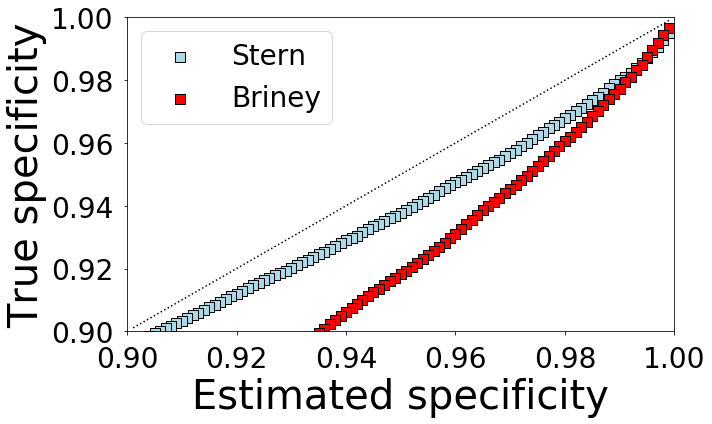

In [231]:
plt.ion()
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(1-pre_vec/100,mean_spec_a,c='lightblue',marker='s',edgecolor='k',s=100,label='Stern')
plt.scatter(1-pre_vec/100,mean_spec_b,c='red',marker='s',edgecolor='k',s=100,label='Briney')
plt.plot(1-pre_vec/100,1-pre_vec/100,c='k',linestyle=':')
plt.xlim((0.9,1))
plt.ylim((0.9,1))
ax.xaxis.label.set_fontsize(40)
ax.yaxis.label.set_fontsize(40)
plt.legend(fontsize=28)
plt.tick_params(labelsize=28,pad=10)
plt.xlabel('Estimated specificity')
plt.ylabel('True specificity')
plt.tight_layout()
fig.savefig('Figs/spec-spec_fin')

In [230]:
np.mean(thresh_array_b)

0.28315376953495935

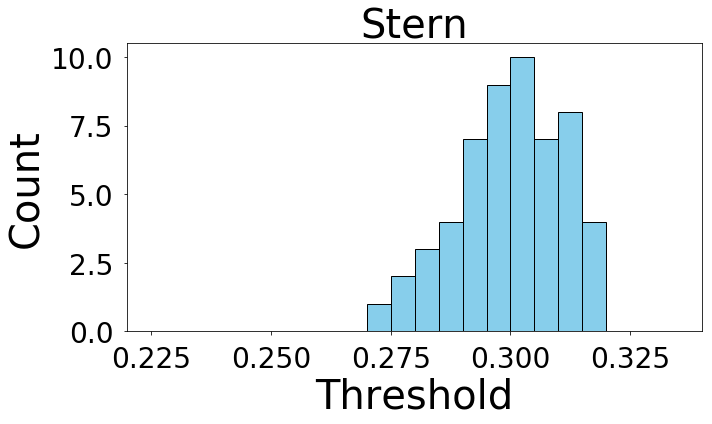

In [232]:
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(thresh_array_a,bins=bins,alpha=1, color='skyblue',ec='k')
ax.xaxis.label.set_fontsize(40)
ax.yaxis.label.set_fontsize(40)
plt.ylabel('Count')
plt.xlabel('Threshold')
plt.xlim([0.22,0.34])
ax.tick_params(labelsize=28,pad=10)
plt.title('Stern',fontsize=40)
plt.tight_layout()
fig.savefig('Figs/Thresh-count-MS_fin')

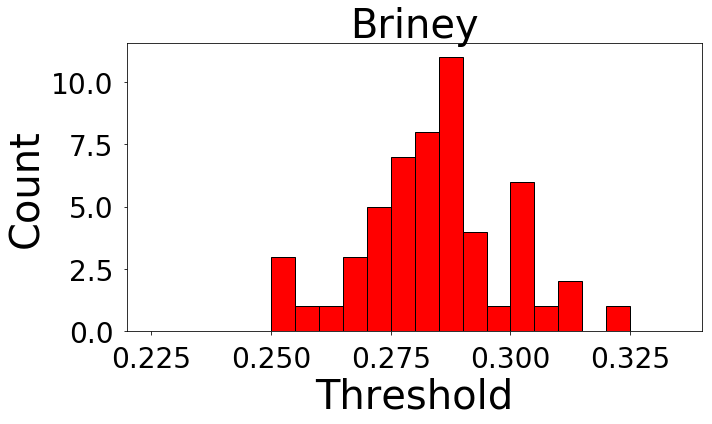

In [214]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(thresh_array_b,bins=bins,alpha=1, color='r',ec='k')
ax.xaxis.label.set_fontsize(40)
ax.yaxis.label.set_fontsize(40)
plt.ylabel('Count')
plt.xlabel('Threshold')
plt.xlim([0.22,0.34])
ax.tick_params(labelsize=28,pad=10)
plt.title('Briney',fontsize=40)
plt.tight_layout()
fig.savefig('Figs/Thresh-count-Briney_fin')